In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm

import wavy

In [2]:
csv_path = '/home/amandacasadei/Downloads/WHO-COVID-19-global-data.csv'
df = pd.read_csv(csv_path)

In [3]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])
df['Day_of_week'] = df['Date_reported'].dt.day_name()
df.drop(columns=["Country_code", "WHO_region", "Day_of_week", "Cumulative_cases", "Cumulative_deaths"], inplace=True)

In [5]:
countries = pd.unique(df["Country"])

df_list = []
for c in countries:
    temp_df = df.loc[df["Country"] == c]
    temp_df.pop("Country")
    date_time = pd.to_datetime(temp_df.pop('Date_reported'), format='%Y.%m.%d')
    temp_df.index = date_time
    df_list.append(temp_df)

processed = pd.concat(df_list, axis=1, keys=(countries))

In [6]:
processed = wavy.block.from_dataframe(processed, asset="Brazil")
processed = processed.wfilter(assets="Brazil", channels="New_deaths")
processed = processed.pct_change()

In [7]:
processed

,Brazil
,New_deaths
Date_reported,
2020-01-03,NaN
2020-01-04,NaN
2020-01-05,NaN
2020-01-06,NaN
2020-01-07,NaN
...,...
2022-01-06,1.302632
2022-01-07,-0.262857


In [8]:
panel1 = wavy.panel.from_data(processed, lookback=7, horizon=7, gap=0)

In [9]:
panel1.y[-10]

,Brazil
,New_deaths
Date_reported,
2021-12-26,0.197080
2021-12-27,-1.000000
2021-12-28,inf
2021-12-29,0.535714
2021-12-30,0.988372
2021-12-31,-0.345029
2022-01-01,0.491071


In [10]:
panel1.x = panel1.x.wmean()
panel1.y = panel1.y.wmean()

  0%|          | 0/726 [00:00<?, ?it/s]

  0%|          | 0/726 [00:00<?, ?it/s]

In [11]:
panel1 = panel1.dropinvalid()

  0%|          | 0/726 [00:00<?, ?it/s]

  0%|          | 0/726 [00:00<?, ?it/s]

  0%|          | 0/726 [00:00<?, ?it/s]

  0%|          | 0/726 [00:00<?, ?it/s]

In [12]:
panel1.x[-1]

,Brazil
,New_deaths
2021-12-14,0.455022


In [13]:
panel1.y = panel1.y > 0.2

In [14]:
panel1.y[-1]

,Brazil
,New_deaths
2021-12-21,False


In [15]:
x = panel1.x.as_dataframe().values
y = panel1.y.as_dataframe().values

In [16]:
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.540056
p-value: 0.007016
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


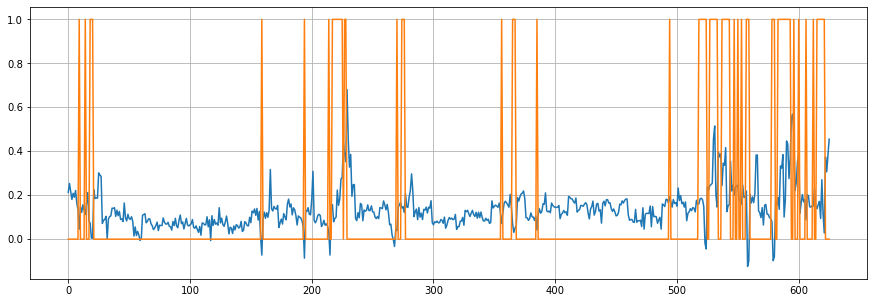

In [19]:
plt.figure(figsize=(15, 5))
plt.plot(x)
plt.plot(y)
plt.grid(True)
plt.show()

In [43]:
convmodel = wavy.model.ConvModel(panel1, model_type="classifier", kernel_size=1)

  0%|          | 0/452 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

In [44]:
convmodel.fit()

15/15 [==============================] - 1s 16ms/step - loss: 0.6878 - auc: 0.3822 - accuracy: 0.7190 - val_loss: 0.6817 - val_auc: 0.5357 - val_accuracy: 0.7500


In [45]:
validation = convmodel.evaluate('val')

4/4 [==============================] - 0s 1ms/step - loss: 0.6817 - auc: 0.5357 - accuracy: 0.7500


In [46]:
validation

[0.681708037853241, 0.5357142686843872, 0.75]

In [47]:
predicted_validation = convmodel.predict_val()

In [48]:
predicted_validation = predicted_validation.as_dataframe().values

In [49]:
predicted_validation

array([[0.48854741],
       [0.4882575 ],
       [0.48827156],
       [0.48819542],
       [0.48823759],
       [0.48818642],
       [0.48815989],
       [0.48815924],
       [0.48871064],
       [0.48917854],
       [0.48912683],
       [0.48911238],
       [0.48932934],
       [0.48936608],
       [0.48836032],
       [0.48934498],
       [0.48922944],
       [0.48922858],
       [0.48917592],
       [0.48971149],
       [0.48832813],
       [0.48994756],
       [0.48867613],
       [0.48861071],
       [0.48861775],
       [0.48862395],
       [0.48829317],
       [0.48973277],
       [0.4883053 ],
       [0.48886332],
       [0.48883864],
       [0.48887128],
       [0.48943323],
       [0.48914689],
       [0.48892695],
       [0.48994789],
       [0.4882547 ],
       [0.48827675],
       [0.48830426],
       [0.4881646 ],
       [0.48816913],
       [0.48823395],
       [0.48811764],
       [0.48821563],
       [0.48831677],
       [0.48816991],
       [0.48824233],
       [0.488

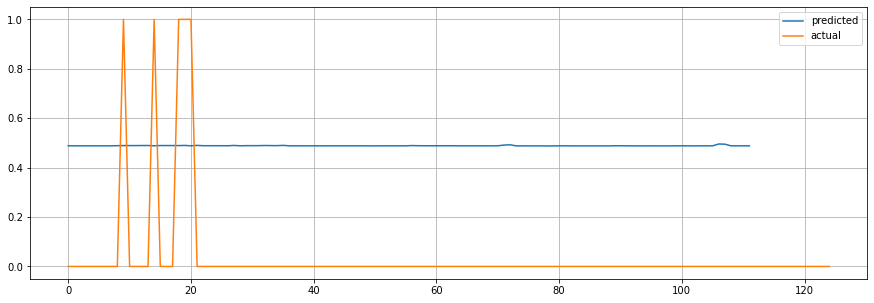

In [53]:
val_len = round(len(y)*0.2)

plt.figure(figsize=(15, 5))
plt.plot(predicted_validation)
plt.plot(y[:val_len])
plt.legend(["predicted", "actual"])
plt.grid(True)
plt.show()

In [56]:
densemodel = wavy.model.DenseModel(panel1, model_type="classifier")

  0%|          | 0/452 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/452 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

In [57]:
densemodel.fit()

15/15 [==============================] - 1s 15ms/step - loss: 0.6793 - auc: 0.4792 - accuracy: 0.9381 - val_loss: 0.6750 - val_auc: 0.4371 - val_accuracy: 0.7500


In [58]:
predicted_validation_dense = densemodel.predict_val()

In [59]:
predicted_validation_dense = predicted_validation_dense.as_dataframe().values

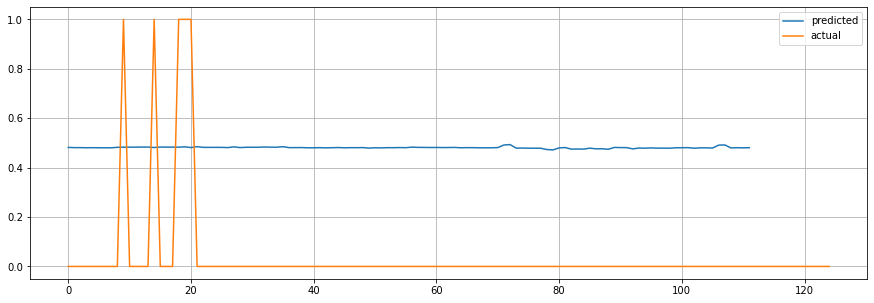

In [61]:
plt.figure(figsize=(15, 5))
plt.plot(predicted_validation_dense)
plt.plot(y[:val_len])
plt.legend(["predicted", "actual"])
plt.grid(True)
plt.show()